# Μηχανική Μάθηση σε δεδομένα από BCI

Γιώργος Παναγόπουλος (gpanagopoulos@iit.demokritos.gr)
[CRU](http://cru.iit.demokritos.gr/)

Η τελευταία έκδοση αυτού του tutorial βρίσκετε [εδώ](https://github.com/GiorgosPanagopoulos/Demokritos-SummerLab-2016).

### Εισαγωγή 

Η βελτιστοποίηση των διεπαφών εγκεφάλου μηχανής (Brain Computer Interfaces - BCI) αποτελεί πρόκληση για πολλούς τομείς της επστήμης ,όπως η ψηφιακή επεξεργασία σήματος, η νευροεπιστήμη, η ψυχολογία κτλ. 
Λόγω της διαφορετικότητας που χαραχτηρίζει κάθε ανθρώπινο εγκέφαλο, ένα BCI καλείτε είτε να προσαρμοστεί σε έναν άνθρωπο για να παράγει αξιόπιστα αποτελέσματα η να ενιχνεύσει και να εκμεταλευτεί πρότυπα εγκεφαλικής δραστηριότητας που ισχύουν σε όλους τους ανθρώπους. Εκεί ξεκινάει ο ρόλος της Μηχανικής Μάθησης.

Ο σκοπός της παρούσας άσκησης είναι αρχικά η εξοικείωση με EEG data και πως μπορούμε να τα χειριστούμε στην python, και μετέπειτα να εξετάσουμε μεθόδους μηχανικής μάθησης με σκοπό να αναγνωρίζουμε πότε ο άνθρωπος κλείνει το δεξί και πότε το αριστερό μάτι με βάση το EEG του.

### Φόρτωση και Οπτικοποίηση των Δεδομένων
Μπορούμε να οπτικοποίησουμε τις EEG χρονοσειρές που καταγράφηκαν κατα τα πειράματα, μέσα από plots.

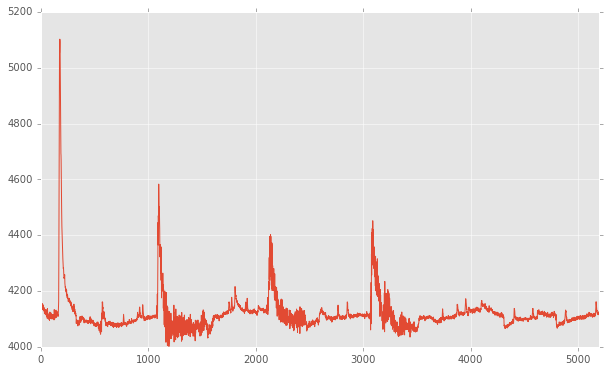

In [13]:
import os
os.chdir('C:\Users\Giwrgos\Dropbox\Summer School\Recordings')

import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import matplotlib.pyplot as plt

raw = pd.read_csv("train\Sub1_Ses1_raw.csv")
ax = raw.ix[:,1].plot()

Επίσης μπορούμε να προσθέσουμε παραπάνω από ένα EEG κανάλι στο plot μας και να τραβήξουμε καθέτους που να δείχνουν πότε ο άνθρωπος έκλεισε το αριστερό μάτι και πότε το δεξί.

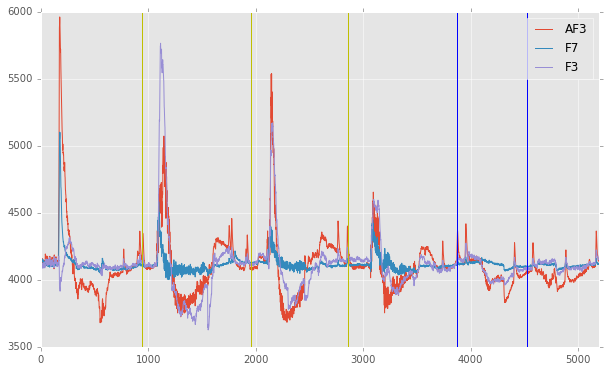

In [14]:
ax = raw.ix[:,0:3].plot()

events = pd.read_csv("train\Sub1_Ses1_events.csv",header = None )

left_events_idx = list(events.ix[events.ix[:,0]<0].index)
for e in left_events_idx:
    ax.axvline(x=e, color='b')

right_events_idx = list(events.ix[events.ix[:,0]>0].index)
for e in right_events_idx:
    ax.axvline(x=e, color='y')

Το describe() είναι επίσης ένας εύκολος τρόπος να βγάλουμε κάποια summary stats για κάθε μεταβλητή του dataset μας, δηλαδή για κάθε κανάλι σε αυτήν την περίπτωση. 

In [15]:
raw.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,FC6,F4,F8,AF4
count,5192.000000,5192.00000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000
mean,4105.684089,4117.83276,4113.557939,4041.407689,4108.184781,4116.456482,4119.115700,4118.216685,4123.307159,4122.967781,4057.691320,4124.745268
std,228.003174,71.46573,216.604324,882.555333,218.875956,85.693514,70.964662,79.040116,141.161344,82.361656,296.033814,154.329411
min,3679.487200,4001.53850,3626.153800,1972.307700,3069.743600,3743.589700,3864.102600,3684.102600,3319.487200,3677.948700,2663.589700,2918.974400
25%,3989.230800,4090.25640,4055.897400,3564.358975,4027.179500,4078.461500,4091.282100,4089.743600,4074.871800,4091.282100,3959.487200,4083.076900
50%,4088.717900,4107.17950,4109.230800,3915.897400,4096.923100,4112.820500,4118.461500,4118.461500,4125.641000,4126.666700,4107.692300,4131.794900
75%,4167.820500,4124.61540,4148.717900,4214.871800,4159.487200,4143.076900,4142.051300,4143.717925,4182.051300,4157.948700,4198.974400,4177.051300
max,5963.076900,5102.56410,5766.666700,7607.692300,5103.076900,4495.384600,4532.820500,4464.615400,4639.487200,4456.410300,6112.307700,5083.076900


Αν παρατηρήσουμε "ύποπτες" τιμές, μπορούμε να χρησιμοποιήσουμε boxplots για να δούμε με μεγαλύτερη λεπτομέρεια πως κατανέμονται οι τιμές για αυτό το κανάλι.

C:\Users\Giwrgos\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xc46c550>],
 'caps': [<matplotlib.lines.Line2D at 0xbb28278>,
 'fliers': [<matplotlib.lines.Line2D at 0xbaf7320>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xbb28d68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x9810240>,
  <matplotlib.lines.Line2D at 0xc46ccc0>]}

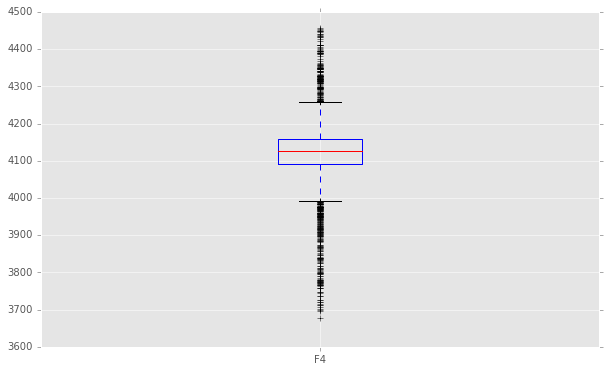

In [19]:
raw.boxplot(column='F4')

### Εξαγωγή Χαραχτηριστικών του Σήματος

Για να πετύχει σωστή αναγνώριση προτύπων ένας αλγόριθμος χρησιμοποιεί δεδομένα που αντιστοιχούν στις περιπτώσεις που θέλουμε να "μάθει". Στην προκειμένη, οι εισόδοι μας στον αλγόριθμο είναι το EEG και η έξοδος είναι το αν ο άνθρωπος έκλεισε το αριστερό η το δεξί του μάτι. Συνεπώς πρέπει να εξάγουμε τα EEG σήματα από κάθε trial.

Είναι σημαντικό να παρατηρήσουμε πως το μήκος ανάμεσα σε δύο κινήσεις ματιών δεν είναι ίδιο. Αυτό συμβαίνει λογω του μεταβαλλόμενου ρυθμού δειγματοληψίας που έχει το EPOC+ και σημαίνει πως δεν μπορούμε να χρησιμοποιήσουμε το σήμα αυτό κάθε αυτό ως είσοδο στον αλγόριθμό μας, αφού τα παραδείγματα στα οποία βασίζεται ο αλγόριθμος πρέπει να έχουν ίδιο μέγεθος.

Αντί του σήματος σαν είσοδο στον αλγόριθμο, θα εισάγουμε τις παρακάτω απλές μετρικές που θα εξάγουμε από το σήμα, ώστε να αποτυπώσουμε όσο το δυνατόν καλύτερα την συμπεριφορά του.

* Μέση τιμή σήματος
* Διακύμανση

In [20]:
import numpy as np

def extract_features(eeg):
    return [np.mean(eeg),np.std(eeg)]

def construct_dataset(raw,events):    
    events_idx = list(events.ix[events.ix[:,0]<>0].index)
    events_idx.append(max(raw.index))
    
    column_names = []
    for channel in raw:
        column_names.extend([
            channel+'_Mean',
            channel+'_Std'])
    
    data = pd.DataFrame(index=range(0,len(events_idx)-1),columns = column_names)

    for e in range(1,len(events_idx)):
        features = raw.ix[range(events_idx[e-1],events_idx[e]-1),:].apply(extract_features)
        data.ix[e-1,:] = [feature for channel in features for feature in channel]
    
    data = data.convert_objects(convert_numeric=True)
    data['class'] = np.array(events.ix[events_idx[0:(len(events_idx)-1)]],dtype=float)

    return(data)

data = construct_dataset(raw,events)

C:\Users\Giwrgos\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Έτσι πετυχαίνουμε ένα είδος μείωσης των διαστάσεων και της πληροφορίας που εισάγουμε στον αλγόριθμο μηχανικής μάθησης, κάτι που είναι γενικά επιθυμητό. 

Θέλοντας να αξιοποιήσουμε όλα τα session από όλους τους συμμετέχοντες στο πείραμα, τα φορτώνουμε και τα επεξεργαζόμαστε με παρόμοιο τρόπο ώστε να καταλήξουμε σε ένα dataset που είναι η ένωση και των 5.

Αξίζει να σημειωθεί ότι λόγω της υψηλής διακύμανσης που συναντάται στην εγκεφαλική δραστηριότητα από άνθρωπο σε άνθρωπο, συνήθως δημιουργούνται εξατομικευμένα μοντέλα μηχανικής μάθησης για κάθε συμμετέχοντα. Λόγω απλότητας σε αυτό το tutorial, θα χρησιμοποιήσουμε μόνο ένα μοντέλο για όλους τους συμμετέχοντες. Η προσέγγιση αυτή ονομάζεται pooled analysis. 

In [21]:
for sub in range(1,6):
    for ses in range(1,5):
        if sub==1 and ses==1:
            continue
        raw = pd.read_csv('train\Sub'+str(sub)+'_Ses'+str(ses) +'_raw.csv')    
        events = pd.read_csv('train\Sub'+str(sub)+'_Ses'+str(ses)+'_events.csv',header = None )
        data = data.append(construct_dataset(raw,events),ignore_index=True)

data['class'] = (data['class']+1)/2

data.to_csv('bci_dataset.csv',index=False)

C:\Users\Giwrgos\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


### Διερευνητική Ανάλυση

Το λεγόμενο Exploratory Data Analysis είναι ίσως η πιο βασική τεχνική που ακολουθούν οι επιστήμονες και οι data scientists για να καταλάβουν τα δεδομένα τους και να βγάλουν συμπεράσματα.

Επειδή ο σκοπός της ανάλυσης μας είναι η καλύτερη πρόβλεψη της κλάσης, μπορούμε να εξερευνήσουμε την διαφορά που έχουν τα feature ως προς τις δύο κλάσεις. Σε περιπτώσεις που ένα feature έχει πολύ όμοια συμπεριφορά και στις δύο κλάσεις, μια απλή προσσέγγιση είναι να το αφαιρέσουμε από την διαδικασία, αφού πιθανόν να μην βοηθήσει τον αλγόριθμο μας να ξεχωρίσει τις κλάσεις. 

Στα παραδείγματα παρακάτω, χρησιμοποιούμε boxplot και probability densities για να ανιχνεύσουμε ποια feature δεν εχουν αισθητές διαφορές από την μια κλάση στην άλλη.

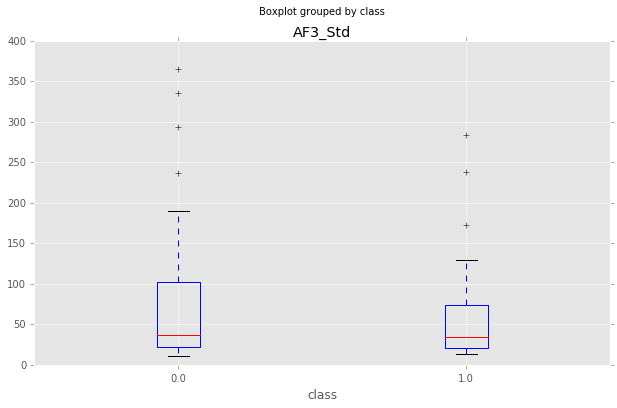

In [26]:
data.boxplot(column='AF3_Std',by='class')

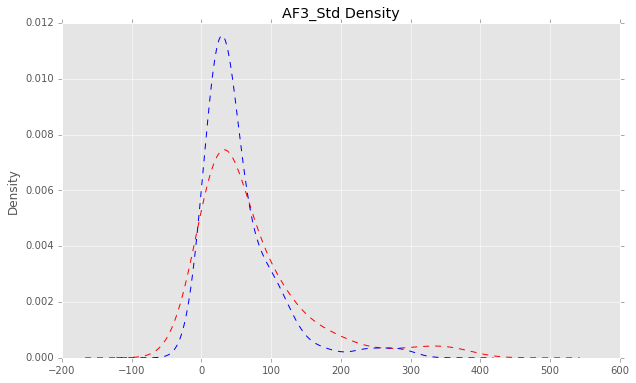

In [28]:
data_right = data.ix[data['class']>0.5,0:data.shape[1]-1]
data_left = data.ix[data['class']<0.5,0:data.shape[1]-1]

data_left['AF3_Std'].plot(kind='density',style='r--')
data_right['AF3_Std'].plot(kind='density',style='b--')
plt.title('AF3_Std Density')

### Εφαρμογή Νευρωνικού Δικτύου

Για να φτιάξουμε το μοντέλο μηχανικής μάθησης που θα προβλέπει πότε κάποιος κλέινει το αριστερό η δεξί μάτι, θα χρησιμοποιήσουμε την βιβλιοθήκη [Keras](http://keras.io/), που χρησιμοποιείται συχνά για εφαρμογές deep learning.

Θα δουλέψουμε με αρχιτεκτονικές ενός κρυμμένου επιπέδο, ενώ θα πειραματιστούμε με τον αριθμό κόμβων, ώστε να βρούμε τον βέλτιστο. Για να συγκρίνουμε την απόδοση του μοντέλου μας σε σχέση με τον αριθμό των κόμβων, θα τρέξουμε πειράματα και θα σχεδιάσουμε την απόδοση του κάθε μοντέλου, με βάση την ακρίβεια και το mean squared error του. 

Λόγω της σιγμοιδούς συνάρτησης που χρησιμοποιούμε σαν activation function στο νευρωνικό, πρέπει επίσης να "ομαλοποιήσουμε" τα δεδομένα μας και να μετατρέψουμε την κλάση στο διάστημα (0,1).

In [30]:
data_normed = (data - data.mean()) / (data.max() - data.min())
data_normed['class']+=0.5

data_normed.to_csv('bci_dataset_normed.csv',index=False)

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import numpy as np

loss_history = []
acc_history = []

n_features = data_normed.shape[1]-1
n_rows = data_normed.shape[0]
train = np.array(data_normed.ix[:,0:n_features])
Y = np.array(data_normed.ix[:,n_features])

for n_nodes in range(1,10):
    print('nodes used :',n_nodes)
    
    model = Sequential([
        Dense(n_nodes, input_dim = data_normed.shape[1]-1,activation='tanh'),
        Dense(1,activation='tanh')
        ])
    
    model.compile(loss = 'mse', 
              optimizer = SGD(lr = 0.1),
              metrics = ['accuracy'])
         
    result = model.fit(train, Y,
              nb_epoch = 100,
              batch_size = n_rows)
   
    acc = result.history['acc'][-1]
    loss = result.history['loss'][-1]
    
    print('loss: ', loss)
    loss_history.append(loss)
    print('accuracy: ', acc)
    acc_history.append(acc)

('nodes used :', 1)
Epoch 1/100
120/120 [==============================] - 0s - loss: 0.5410 - acc: 0.5000
Epoch 2/100
120/120 [==============================] - 0s - loss: 0.4227 - acc: 0.5000
Epoch 3/100
120/120 [==============================] - 0s - loss: 0.3591 - acc: 0.4917
Epoch 4/100
120/120 [==============================] - 0s - loss: 0.3244 - acc: 0.4667
Epoch 5/100
120/120 [==============================] - 0s - loss: 0.3047 - acc: 0.4583
Epoch 6/100
120/120 [==============================] - 0s - loss: 0.2930 - acc: 0.4417
Epoch 7/100
120/120 [==============================] - 0s - loss: 0.2856 - acc: 0.4500
Epoch 8/100
120/120 [==============================] - 0s - loss: 0.2808 - acc: 0.4667
Epoch 9/100
120/120 [==============================] - 0s - loss: 0.2776 - acc: 0.4417
Epoch 10/100
120/120 [==============================] - 0s - loss: 0.2753 - acc: 0.4417
Epoch 11/100
120/120 [==============================] - 0s - loss: 0.2737 - acc: 0.4167
Epoch 12/100
120/120 

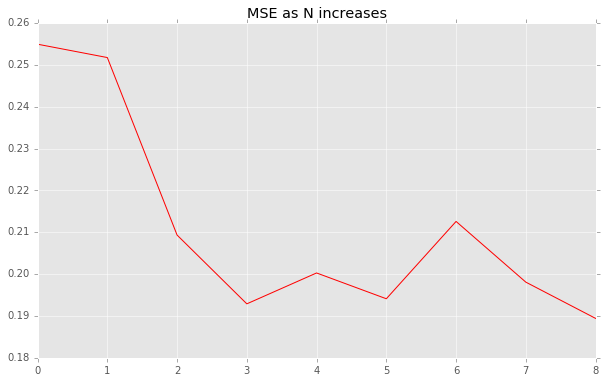

In [31]:
plt.plot(loss_history,color='r')
plt.title('MSE as N increases')

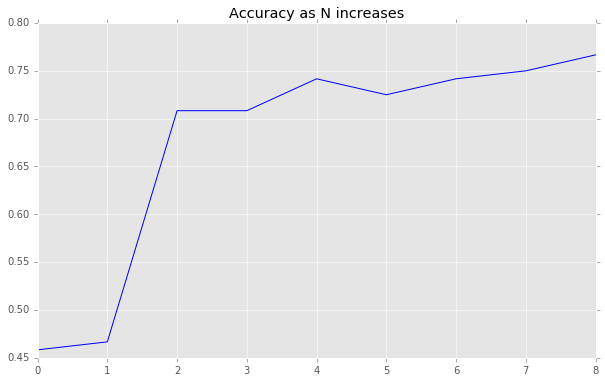

In [32]:
plt.plot(acc_history,color='b')
plt.title('Accuracy as N increases')

### Αξιολόγηση Ικανότητας Γενίκευσης

Ενας αλγόριθμος μηχανικής μάθησης αξιολογείται ουσιαστικά με βάση την ικανότητα πρόβλεψης σε δεδομένα που δεν έχει εκπαιδευτεί. Έτσι υπολογίζεται το πόσο καλά έχει μάθει τους πραγματικούς "κανόνες" που διέπουν τα δεδομένα, και όχι μόνο τις περιπτώσεις στις οποίες έχει εκπαιδευτεί. Η κατανόηση εναντίον της παπαγαλίας! 

Για να γίνει αυτό, το τελικό μοντέλο δημιουργεί προβλέψεις για δεδομένα τα οποία δεν έχει ξαναδεί. Πριν όμως δημιουργηθεί το τελικό μοντέλο, πρέπει να υπάρχει ένας τρόπος να αξιολογήσουμε την ικανότητα γενίκευσης του αλγορίθμου, αφού η αποδόση του στα δεδομένα εκπαίδευσης δεν είναι πάντα αξιόπιστο κριτήριο. Προκειμένου λοιπόν να προσομειώσουμε το test των "unseen data", χωρίζουμε το αρχικό μας dataset σε δύο μέρη, ένα στο οποίο θα εκαπιδευτεί ο αλγόριθμος και ένα που θα παίξει το ρόλο του test set.

In [33]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(data_normed, test_size = 0.2)
train = np.array(train)
test = np.array(test)

model.fit(train[:,0:n_features],
          train[:,n_features],
          nb_epoch=100,
          batch_size = n_rows)

score = model.evaluate( test[:,0:n_features] , test[:,n_features] , batch_size=n_rows)

print('loss: '+str(score[0]))
print('acc: '+str(score[1]))

Epoch 1/100
96/96 [==============================] - 0s - loss: 0.1910 - acc: 0.7500
Epoch 2/100
96/96 [==============================] - 0s - loss: 0.1906 - acc: 0.7500
Epoch 3/100
96/96 [==============================] - 0s - loss: 0.1902 - acc: 0.7500
Epoch 4/100
96/96 [==============================] - 0s - loss: 0.1898 - acc: 0.7500
Epoch 5/100
96/96 [==============================] - 0s - loss: 0.1894 - acc: 0.7500
Epoch 6/100
96/96 [==============================] - 0s - loss: 0.1891 - acc: 0.7500
Epoch 7/100
96/96 [==============================] - 0s - loss: 0.1887 - acc: 0.7500
Epoch 8/100
96/96 [==============================] - 0s - loss: 0.1883 - acc: 0.7396
Epoch 9/100
96/96 [==============================] - 0s - loss: 0.1880 - acc: 0.7500
Epoch 10/100
96/96 [==============================] - 0s - loss: 0.1876 - acc: 0.7500
Epoch 11/100
96/96 [==============================] - 0s - loss: 0.1873 - acc: 0.7500
Epoch 12/100
96/96 [==============================] - 0s - loss

Τέλος, φορτώνουμε τα πραγματικά test data, για τα οποία δεν έχουμε το Y, και χρησιμοποιούμε το μοντέλο μας για να προβλέψουμε σε τι κλάση αντιστοιχεί το κάθε sample του μοντέλου.

In [ ]:
events = pd.read_csv('test\Sub1_Ses5_raw.csv')    
raw = pd.read_csv('test\Sub1_Ses5_events.csv')
test = construct_dataset(raw,events)

for sub in range(2,6):
    raw = pd.read_csv('test\Sub'+str(sub)+'_Ses5_raw.csv')    
    events = pd.read_csv('test\Sub'+str(sub)+'_Ses5_events.csv',header = None )
    test = test.append(construct_dataset(raw,events),ignore_index=True)

pd.DataFrame(model.predict_classes(test_data)).to_csv('bci_predictions.csv',index=False)